# Volatility model project ,Sergio Pulido, M2QF

**Student** :  
ACIKGOZ Rayan   
BENBOUZID Zakaria

In [ ]:
from math import *
from random import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1. Estimation of the Parameter H

1.

For the curve $g_0(t)$ we have that :

$$
 \int_{0}^{t} e^{-x_i(t-s)} ds =  \int_{0}^{t} e^{-x_iu} du = \frac{1-e^{-x_it}}{x_i}
$$

so we have
$$
g_0(t)= V_0 + λ θ \sum_{i=1}^{n} \frac{c_i(1-e^{-x_it} ) }{x_i}
$$


In [ ]:
n=20
m=100000
dt=1/m
r=2.5
alpha=0.6
lambd= 0.3
theta= 0.05
V0=0.05
nu=0.1
time=np.linspace(0,1,m+1)
# We first define our x_i and c_i

list_c=[]
list_x=[]
c0=((r**(1- alpha) -1)/(gamma(alpha)*gamma(2-alpha))) # to avoid to re-use gamma for each c_i
x0= ((1- alpha)/(2-alpha))* ((r**(2-alpha)-1)/(r**(1-alpha)-1))
for i in range(1,n+1): # to start at 1 , we still have n=20 value
  list_c.append(c0 * r**((1-alpha)*(i-1-n/2)) )
  list_x.append(x0 * r**(i-1-n/2))


Var=[] # V_tk
Util_t1=[] # U_tk no matrice to not stock useless data
for i in range(n): # Initialisation
  Util_t1.append(0)
for t in time: # calculate each V_tk using the last value of V_tk and U_tk
  somme=0
  for i in range(n):
    somme = somme + list_c[i]* ( lambd* theta *(1- exp(-list_x[i]*t))/list_x[i] + Util_t1[i] ) # we put the 2 sum together
  Var.append(somme + V0)
  tempo= lambd*Var[-1]*dt + nu*sqrt(max(0,Var[-1]))* np.random.normal(0,dt) # to keep the same W_k even when i changed just like in the slide
  for i in range(n): # Var[-1] last value of V_tk
    Util_t1[i]= (1/ (1+ list_x[i]*dt)) * ( Util_t1[i]- tempo ) # become U_tk+1

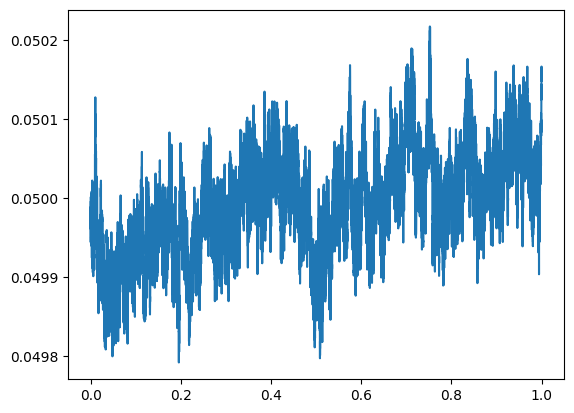

In [ ]:
plt.plot(time,Var)

2.

  Pour q = 0.5  zeta = 0.2354873901222242  et C_q= -6.164380297113386
  Pour q = 1  zeta = 0.4699771258103926  et C_q= -12.162144336767488
  Pour q = 1.5  zeta = 0.7039637217783716  et C_q= -18.054330933812647
  Pour q = 2  zeta = 0.9376886706988975  et C_q= -23.87029079565293


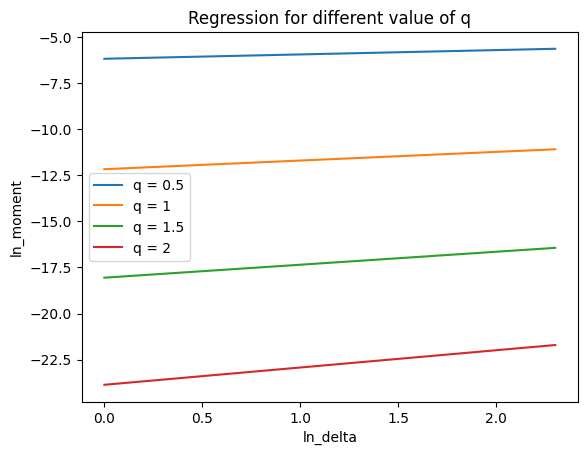

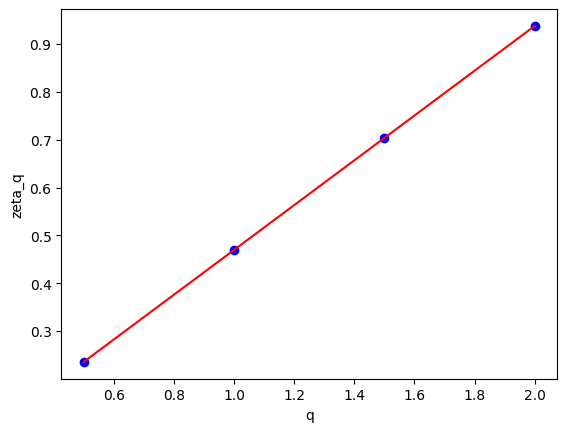

 the slope H is :  0.4681180875395999


In [ ]:
def moment_with_ln(list_q,Var):
  res=[]
  for q in list_q:
      ln_moment=[]
      ln_delta=[]
      for delta in range(1,11):
          somme=0
          for i in range(len(Var)- delta):
              somme += abs(Var[i+delta] - Var[i])**q
          ln_moment.append(log(somme/(len(Var)- delta)))
          ln_delta.append(log(delta))
      model = LinearRegression()
      ln_moment = np.array(ln_moment).reshape(-1, 1)
      ln_delta = np.array(ln_delta).reshape(-1, 1)
      model.fit(ln_delta, ln_moment)
      zeta = model.coef_[0][0]
      res.append(zeta)
      b = model.intercept_[0]
      print("  Pour q =",q ," zeta =", zeta, " et C_q=", b)
      plt.plot(ln_delta, model.predict(ln_delta), label='q = {}'.format(q))
  plt.xlabel('ln_delta')
  plt.ylabel('ln_moment')
  plt.title('Regression for different value of q')
  plt.legend()
  plt.show()
  return res

list_q=[0.5,1,1.5,2]
zeta=moment_with_ln([0.5,1,1.5,2],Var)

print("\n")

model = LinearRegression()
zeta = np.array(zeta).reshape(-1, 1)
list_q = np.array(list_q).reshape(-1, 1)
model.fit(list_q, zeta)

plt.scatter(list_q, zeta, color='blue')
plt.plot(list_q, model.predict(list_q), color='red')
plt.xlabel('q')
plt.ylabel('zeta_q')
plt.show()
print(" the slope H is : ", model.coef_[0][0] )

Our answer is close to H= 0.5 which seems far off the real value (0.1 in our value) .

3.

We reuse the same fonction but without the plot

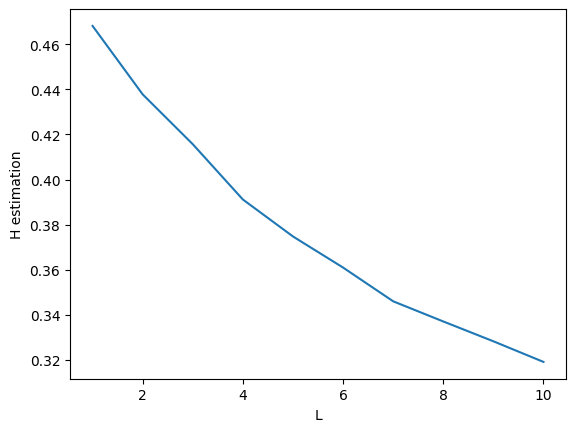

In [ ]:
def Slope_with_moment(l,Var):
  Var_l=[]
  for i in range( (m//l) ):
    Var_l.append(Var[i*l])
  res=[]
  for q in [0.5,1,1.5,2]:
      ln_moment=[]
      ln_delta=[]
      for delta in range(1,11):
          somme=0
          for i in range(len(Var_l)- delta):
              somme += abs(Var_l[i+delta] - Var_l[i])**q
          ln_moment.append(log(somme/(len(Var_l)- delta)))
          ln_delta.append(log(delta))
      model = LinearRegression()
      ln_moment = np.array(ln_moment).reshape(-1, 1)
      ln_delta = np.array(ln_delta).reshape(-1, 1)
      model.fit(ln_delta, ln_moment)
      zeta = model.coef_[0][0]
      res.append(zeta)
      b = model.intercept_[0]
  model = LinearRegression()
  res = np.array(res).reshape(-1, 1)
  list_q = np.array([0.5,1,1.5,2]).reshape(-1, 1)
  model.fit(list_q, res)
  return model.coef_[0][0]

res=[]
for l in range(1,11):
  res.append(Slope_with_moment(l,Var))

plt.plot(range(1,11),res)
plt.xlabel('L')
plt.ylabel('H estimation')
plt.show()

We can see that when L is bigger we tend to approch the real value of H ( 0.1 here ). So the smaller the sample the better the result according to this graph. So we can say that in Lifted Heston model , the spot variance is close to a true Brownian motion.

4.

We change the variables "Var" at our function and re use it. But first we need to calculate the new Var for a Brownian Motion. The path will be created with  
$$
W_{t_{k+1}} = W_{t_{k}} + \mathcal{N}(0,t_{k+1}-t_{k}) ~ \text{ and } ~ W_0=0
$$


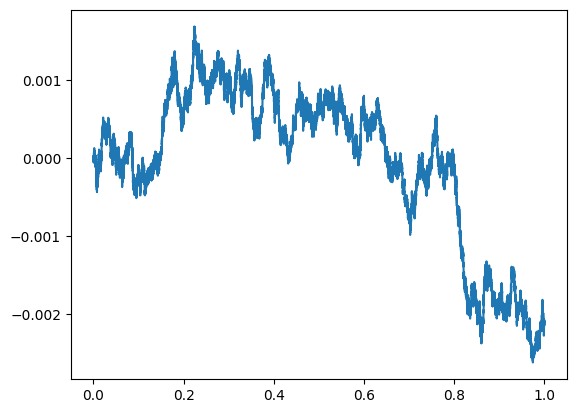

In [ ]:
# define the new Var :
BM=[0]
for t in time[1:]:
  BM.append( BM[-1] + np.random.normal(0,dt) )

plt.plot(time,BM)

  Pour q = 0.5  zeta = 0.247760402389052  et C_q= -5.950586376770635
  Pour q = 1  zeta = 0.4959781377009229  et C_q= -11.735908360072129
  Pour q = 1.5  zeta = 0.74406175915638  et C_q= -17.416001772450986
  Pour q = 2  zeta = 0.9917662248279324  et C_q= -23.01987443259831


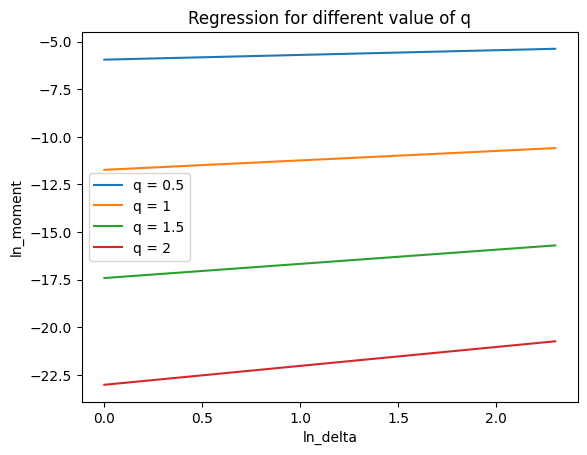

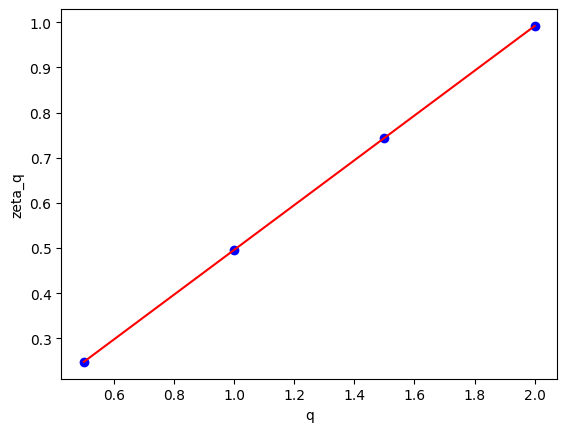

 the slope H is :  0.49602021775441973


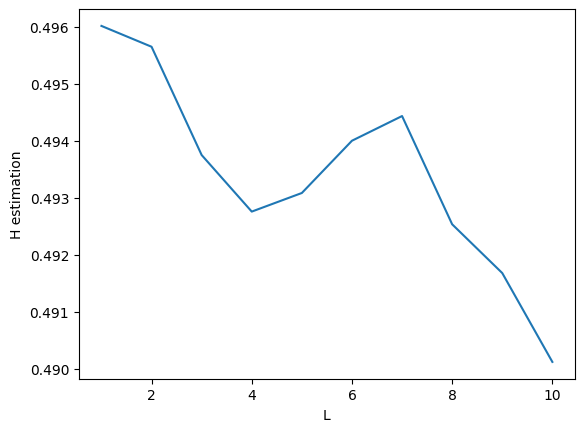

In [ ]:
list_q=[0.5,1,1.5,2]
zeta=moment_with_ln([0.5,1,1.5,2],BM)

print("\n")

model = LinearRegression()
zeta = np.array(zeta).reshape(-1, 1)
list_q = np.array(list_q).reshape(-1, 1)
model.fit(list_q, zeta)

plt.scatter(list_q, zeta, color='blue')
plt.plot(list_q, model.predict(list_q), color='red')
plt.xlabel('q')
plt.ylabel('zeta_q')
plt.show()
print(" the slope H is : ", model.coef_[0][0] )


res=[]
for l in range(1,11):
  res.append(Slope_with_moment(l,BM))

plt.plot(range(1,11),res)
plt.xlabel('L')
plt.ylabel('H estimation')
plt.show()

For a true BM our value is really close to H=0.5 so the algorithm seems to work. And when L is smaller (L=1 is the full sample) we have better result which seems normal.

5.

In [ ]:
m=1000
dt=1/m
time=np.linspace(0,1,m+1)
H=0.1
fBM_cov=np.zeros((m,m))
for i in range(1,m+1):
  for j in range(1,m+1): # start at t1 NOT t0 here
    fBM_cov[i-1,j-1]= ( (i*dt)**(2*H) + (j*dt)**(2*H) - (abs(i-j)*dt)**(2*H) )/2

In [ ]:
# Now we use Cholesky decomposition
C=np.linalg.cholesky(fBM_cov)
Z= np.random.normal(0,1,m)
Z.shape

(1000,)

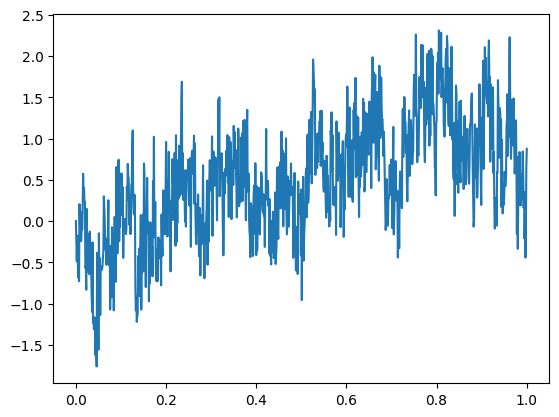

In [ ]:
X=np.dot(C,Z)
X.shape

fBM=[0]
for i in range(m):
  fBM.append(X[i])

plt.plot(time,fBM)

  Pour q = 0.5  zeta = 0.06971154259051046  et C_q= -0.5655758510905716
  Pour q = 1  zeta = 0.13709263994711743  et C_q= -0.9613021254371212
  Pour q = 1.5  zeta = 0.2054597098226075  et C_q= -1.2554765888990103
  Pour q = 2  zeta = 0.2755692329629871  et C_q= -1.4797025148521696


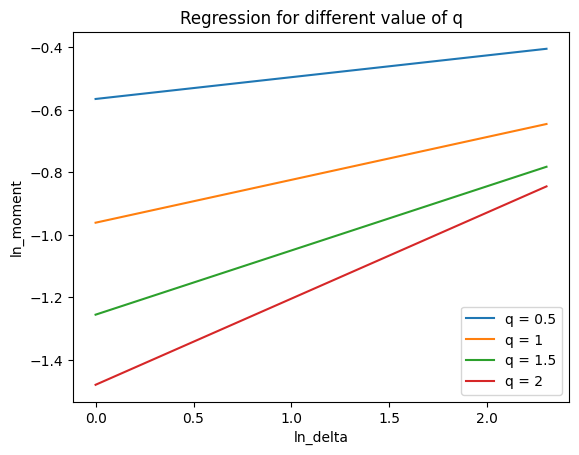

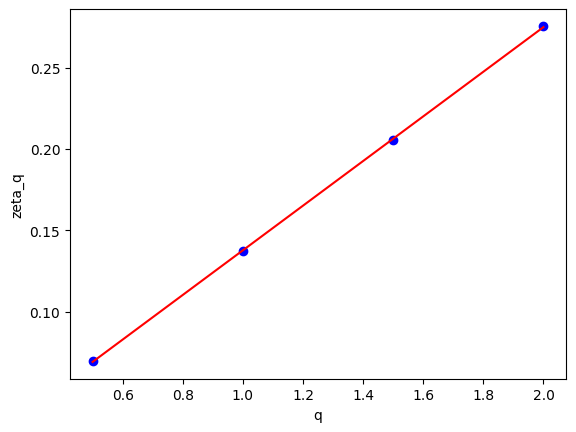

 the slope H is :  0.13718802819858397


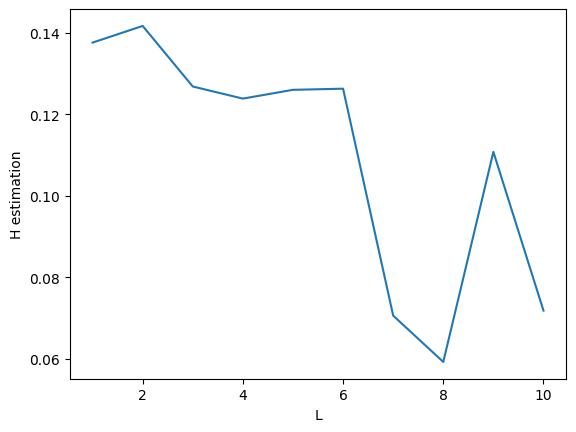

In [ ]:
list_q=[0.5,1,1.5,2]
zeta=moment_with_ln([0.5,1,1.5,2],fBM)

print("\n")

model = LinearRegression()
zeta = np.array(zeta).reshape(-1, 1)
list_q = np.array(list_q).reshape(-1, 1)
model.fit(list_q, zeta)

plt.scatter(list_q, zeta, color='blue')
plt.plot(list_q, model.predict(list_q), color='red')
plt.xlabel('q')
plt.ylabel('zeta_q')
plt.show()
print(" the slope H is : ", model.coef_[0][0] )


res=[]
for l in range(1,11):
  res.append(Slope_with_moment(l,fBM))

plt.plot(range(1,11),res)
plt.xlabel('L')
plt.ylabel('H estimation')
plt.show()

The model work and give a good aproximation of the slope (0.1), and taking samples here does not seems to make the model better or worse.

## 2. Implied volatility in the Lifted Heston model

voir poly pour le calcul ( full latex question 1 & 2 )

***1.a*** :

We start by remembering our model :
$$
dS_t= S_t \sqrt{V_t} dB_t
$$
$$
V_t= g_0(t) + \sum_{i=1}^n c_i U_t^{i}
$$
$$
dU_t^{i}= (-x_i U_t^{i} - \lambda V_t )dt + \nu \sqrt{V_t}dW_t
$$
$$
d<B,W>_t = \rho dt
$$

We will also pose w as :
$$
w= \sum_{i=1}^n c_i \psi ^{i} (T-t)
$$
doing so give us that the Riccati ODE can be written as this :
$$
(\psi ^{i} )'(T-t)= -x_i \psi ^{i}(T-t) + F(u,w)
$$
$$
\frac{\partial \phi(t,T) }{\partial t} = F(u,w)g_0(t)
$$

We will use Ito formula with $M_t= exp(X_t)$ with :
$$
X_t= ulog(S_t) + \phi (t,T) + \sum_{i=1}^n c_i \phi ^{i}(T-t) U_t ^{i}
$$
$$
dM_t= e^{X_t}dX_t + \frac{1}{2} e^{X_t}d[X_t]
$$
$$
\frac{dM_t}{M_t}= dX_t + \frac{1}{2} d[X_t]
$$

We Apply Ito formula to find $dlog(S_t)$ :
$$
dlog(S_t) = \sqrt{V_t}dB_t - \frac{1}{2}V_t dt
$$

with our notation we have that
$$
dX_t= u \sqrt{V_t} dB_t - \frac{u}{2}V_t dt - F(u,w)g_0(t)dt + \sum_{i=1}^n c_i \left[ - (\psi ^{i})'(T-t) U_t ^{i} dt + \psi ^{i}(T-t) \nu \sqrt{V_t} dW_t - x_i U_t ^{i} \psi ^{i}(T-t) dt - \psi^{i}(T-t) \lambda V_tdt \right]
$$
And by replacing $(\psi ^{i})' $ by the Riccati ODE, it simplify to
$$
dX_t= u \sqrt{V_t} dB_t - \frac{u}{2}V_t dt - F(u,w)g_0(t)dt + \sum_{i=1}^n c_i \left[ - F(u,w) U_t ^{i} dt + \psi ^{i}(T-t) \nu \sqrt{V_t} dW_t - \psi^{i}(T-t) \lambda V_tdt \right]
$$

For the bracket, we have the following :
$$
\frac{1}{2}d[X_t] = \frac{1}{2} \left(  u^2 V_t + (\sum_{i=1}^n c_i \psi ^{i}(T-t) \nu \sqrt{V_t} )^2   + 2 (\sum_{i=1}^n c_i  u \psi ^{i}(T-t) \nu V_t \rho \right)dt
$$
$$
\frac{1}{2}d[X_t] = \frac{1}{2} \left(  u^2 V_t   + (w^2  \nu^2 V_t ) + 2 u (w \nu V_t \rho) \right)dt
$$

To have a locale martingale we only need the term in dt to be null because the term on $dW_t$ and $dB_t$ describe a locale martingale.

The term on dt for $ \frac{dM_t}{M_t}= dX_t + \frac{1}{2} d[X_t] $ is :
$$
- F(u,w)g_0(t) - F(u,w)\sum_{i=1}^n c_i U_t ^i - w \lambda V_t + \frac{1}{2} \left(  u^2 V_t - u V_t + (w^2  \nu^2 V_t ) + 2 u (w \nu V_t \rho) \right)
$$
$$
=  \left( - F(u,w)g_0(t) - F(u,w)\sum_{i=1}^n c_i U_t ^i \right)  +  \left( (  - w \lambda  + u w \nu  \rho)+ \frac{1}{2} ( u^2 -u + w^2  \nu^2  )  \right) V_t
$$
But in our model $V_t= g_0(t) + \sum_{i=1}^n c_i U_t^{i}$ , so the term on the first parenthese simplify and we have :  
$$
\left( - F(u,w) +  \left[ \frac{1}{2}( u^2 -u ) + (u  \rho \nu - \lambda  )w + \frac{1}{2} \nu ^2 w^ 2 \right] \right) V_t = 0
$$
Because of the definition of F from the Riccati ODE we obtain 0. So $\frac{dM_t}{M_t}$ has no term on dt which means that $ln(M_t)$ neither and $M_t$ neither so $M_t$ is indeed a local martingale.

**1.b**




If M is a true martingale then it has the following property :
$$
M_t = \mathbb{E} \left[ M_T | \mathcal{F}_t \right] ~~~~ \text{ for T} \geq t
$$
And looking a $M_T$ we have that $ \phi (T,T)=0 $ (it's a integral on 0) and because
$$
\psi (0) ^ i = 0  ~ ~~~~  \forall ~ i \in [\![ 1,n ]\!]
$$
we have that $M_T=exp(u~ log(S_T))$ so
$$
M_t = \mathbb{E} \left[ exp(u ~log(S_T)) | \mathcal{F}_t \right]
$$

**2.**

To derive the Carr-Madan formula for the price of a European call option, we start with the Fourier inversion formula for the price of a derivative with payoff f($X_T$):

$$C_0 = e^{-rT} \int_{-\infty}^{\infty} e^{-i\omega x} f(x)e^{i\omega x} q(x)dx = \frac{1}{2\pi} e^{-rT} \int_{-\infty}^{\infty} \hat{f}(u+i\omega) \hat{q}(u+i\omega)du
$$

where $\hat{f}$ and $\hat{q}$ are the Fourier transforms of $f$ and $q$ respectively, and $\omega$ is chosen to make $e^{-\omega x}f(x)$ integrable and such that $\hat{q}(\omega)$ is well-defined. Here, $q$ is the density function of $X_T$.

In our case, $X = \log(S)$, so $f(x) = e^{-rT} (e^x - K)^+$ , and $\hat{f}(u)$ is the characteristic function $\Phi_T(u)$ of the log underlying price $S_T$. Therefore, we have:

$$C_0 = \frac{1}{2\pi} e^{-rT} \int_{-\infty}^{\infty} \Phi_T(u+i\omega) \hat{q}(u+i\omega)du$$





**3.**

In [ ]:
from scipy.special import gamma

def F(u, v, rho, lamb, nu):
    # Definition of the F function used for the calculation of psi
    return 0.5 * (u**2 - u) + (rho * nu * u - lamb) * v + 0.5 * (nu**2) * (v**2)

def Integration(dx, dt):
    # Integration method for g_0 and phi
    Integral = 0
    Integral_real = 0
    Integral_imag = 0
    for i in range(len(dx) - 1):
        Integral_real = (np.real(dx[i]) + np.real(dx[i+1])) / 2 * dt
        Integral_imag = (np.imag(dx[i]) + np.imag(dx[i+1])) / 2 * dt
        Integral += Integral_real + Integral_imag
    return Integral

def Ch_Lifted_Heston(u, S0, T, rho, lamb, theta, nu, V0, n, rn, alpha, M):

    # Definition of the step, the weights and the mean reversions (Slide 13 Lesson 3)
    dt = T / M
    c = [(rn**(1-alpha) - 1) / (gamma(alpha) * gamma(2 - alpha)) * (rn**(1-alpha) * (i - 1 - n/2)) for i in range(1, n + 1)]
    x = [(1 - alpha) / (2 - alpha) * ((rn**(2 - alpha) - 1) / (rn**(1 - alpha) - 1)) * (rn**(i - 1 - n/2)) for i in range(1, n + 1)]

    # Definition of g_0 from question 1
    g_0 = np.zeros(M+1, dtype=complex)
    for t in range(M):
        g_0[t+1] = V0 + lamb * theta * sum(c[j] * Integration([np.exp(-(t-s) * x[j]) for s in range(t)], dt) for j in range(n))

    # Definition of psi from Slide 19 Leson 3 using Riccati ODEs
    psi = np.zeros((M+1, n), dtype=complex)
    for t in range(M):
        for i in range(n):
            psi[t+1, i] = (1 / (1 + x[i] * dt)) * (psi[t, i] + F(u, sum(c[j] * psi[t, j] for j in range(n)), rho, lamb, nu) * dt)

    # Definition of U from Slide 19 Lesson 3 with an implicit-explicit Euler scheme, used for the calculation of the
    U = np.zeros((M+1, n), dtype=complex)
    W = np.random.normal(size=(M+1,))
    for t in range(M):
        for i in range(n):
            U[t+1, i] = (1 / (1 + x[i] * dt)) * (U[t, i] - lamb * (g_0[t] + sum(c[j] * U[t, i] for j in range(n))) * dt + nu * np.sqrt(max(0, (g_0[t] + sum(c[j] * U[t, i] for j in range(n))))) * (W[t+1] - W[t]))

    # Definition of phi from Slide 14 Lesson 3
    phi = np.zeros(M+1, dtype=complex)
    for t in range(1, M+1):
        phi[t] = (F(u, sum(c[i] * psi[t, i] for i in range(n)), rho, lamb, nu) * g_0[int(T)+1-t])

    # We return the Characteristic Function
    return (np.exp(u * np.log(S0) + phi[M] + sum(c[i] * psi[M]*T*U[M,i] for i in range(n))))

**4.**

In [ ]:
def Call_Price_Lifted_Heston(S_0, K, T, rho, lamda, theta, nu, V_0, n, r_n, alpha, M, alpha_2, L):

    # Approximation of Carr-Madan integral
    Integration = lambda u: np.real((np.exp(-1j * u * np.log(K)) / (alpha_2 + 1j * u) / (alpha_2 + (1 + 1j * u))) * Ch_Lifted_Heston(u *1j + (alpha_2* + 1), S0, T, rho, lamda, theta, nu, V0, n, rn, alpha, M))

    # Approximate the integral using the trapezoidal rule
    Approx_Integral = sum(Integration(i*L/M) for i in range(M)) * L / M
    # Final calculation of the call option price
    C0 = (np.exp(- alpha_2 * np.log(K)) / np.pi) * Approx_Integral
    return C0

S0 = 1
rho = -0.7
lamb = 0.3
theta = 0.02
nu = 0.3
V0 = 0.02
alpha = 0.6
T = 1
M = 100
n = 25
rn = 1 + 10 * n**(-0.9)
alpha_2 = 1
L = 100
K = 1

Call_Price_Lifted_Heston(S0, K, T, rho, lamb, theta, nu, V0, n, rn, alpha, M, alpha_2, L)

array([ 9.62785952e+58,  5.58162266e+58,  1.44107454e+58, -5.85088972e+57,
       -2.28023272e+57,  2.10835521e+56, -6.19744505e+54, -9.99009142e+51,
       -9.23674506e+48, -1.27586964e+43, -9.52383659e+36, -9.85115448e+27,
        7.64379521e+17, -3.82619803e+08, -2.85681068e+01,  9.96348659e-02,
        8.44553855e-02,  8.33517360e-02,  8.34919884e-02,  8.38983770e-02,
        8.42124249e-02,  8.44211319e-02,  8.45563291e-02,  8.46434710e-02,
        8.46995854e-02])

**5**

Unfortunately, the implied volatility had some issues that we did have the time to correct. We understood the problem but one issue gave us an other etc and we did not want to pass too much time on 1 question.

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Function to compute implied volatility from our call option price
#def implied_volatility(S0, K, T, rho, lamb, theta, nu, V0, n, rn, alpha, M, alpha_2, L, call_price):
    # Black-Scholes formula to have our initial possible implied volatility
#    def black_scholes_implied_volatility(call_price):

#        def black_scholes_call(S, K, T, r, sigma):
#            d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
#            d2 = d1 - sigma * np.sqrt(T)
#            return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
#
#        def function_BS(sigma):
#            return black_scholes_call(S0, K, T, rn, sigma) - call_price
#
        # Find implied volatility using Brent's method
#        implied_v = brentq(function_BS, 0.001, 10, xtol=1e-6)

 #       return implied_v

    # Compute implied volatility for each call price
#    implied_volatilities = []
#    for price in call_price:
#        Impl = black_scholes_implied_volatility(price)
#        implied_volatilities.append(Impl)

#    return implied_volatilities

# Parameters
#S0 = 1
#rho = -0.7
#lamb = 0.3
#theta = 0.02
#nu = 0.3
#V0 = 0.02
#alpha = 0.6
#alpha_2 = 1
#M = 100

# Truncation level and number of strikes
#L_a = 500
#L_b = 1000
#num_strikes = 2

# Log strikes range
#log_strikes_a = np.linspace(-1.2, 0.2, num_strikes)
#log_strikes_b = np.linspace(-0.15, 0.05, num_strikes)

# Number of factors
#n = 10

# Compute call option prices for different n values and T
#call_prices_a = [Call_Price_Lifted_Heston(S0, np.exp(log_strike), 1, rho, lamb, theta, nu, V0, n, 1 + 10 * n**(-0.9), alpha, M, alpha_2, L_a) for log_strike in log_strikes_a]
#call_prices_b = [Call_Price_Lifted_Heston(S0, np.exp(log_strike), 1/26, rho, lamb, theta, nu, V0, n, 1 + 10 * n**(-0.9), alpha, M, alpha_2, L_b) for log_strike in log_strikes_b]

# Compute implied volatilities
#implied_vols_a = implied_volatility(S0, np.exp(log_strikes_a), 1, rho, lamb, theta, nu, V0, n, 1 + 10 * n**(-0.9), alpha, M, alpha_2, L_a, call_prices_a[num_strikes - 1])
#implied_vols_b = implied_volatility(S0, np.exp(log_strikes_b), 1/26, rho, lamb, theta, nu, V0, n, 1 + 10 * n**(-0.9), alpha, M, alpha_2, L_b, call_prices_b[num_strikes - 1])

# Plotting the implied volatility smiles
#fig, axs = plt.subplots(2, 2, figsize=(14, 10))

#for i, n in enumerate(n):
#    axs[0, 0].plot(log_strikes_a, implied_vols_a[n], label=f'n = {n}')
#    axs[0, 0].set_title('T = 1, L = 100')
#    axs[0, 0].set_xlabel('Log Strike')
#    axs[0, 0].set_ylabel('Implied Volatility')
#    axs[0, 0].legend()

#for i, n in enumerate(n):
#    axs[0, 1].plot(log_strikes_b, implied_vols_b[n], label=f'n = {n}')
#    axs[0, 1].set_title('T = 1/26, L = 1000')
#    axs[0, 1].set_xlabel('Log Strike')
#    axs[0, 1].set_ylabel"

## 3. Implied volatility in the Lifted/Rough Bergomi model

**1**.

In [ ]:
# Define parameters
H = 0.1
eta = 1.9
rho = -0.9
S0 = 1
xi0 = 0.02
T = 1  # Maturity
n = 25  # Different values of n
rn = 1 + 10 * n**(-0.9)
alpha = 0.6
K=100

def Sim_Lifted_Bergomi(H, eta, rho, S0, xi0, T, n, rn, alpha):

    M = 1000

    # Definition of the weights and the mean reversions (Slide 13 Lesson 3)
    c = [(rn**(1-alpha) - 1) / (gamma(alpha) * gamma(2 - alpha)) * (rn**(1-alpha) * (i - 1 - n/2)) for i in range(1, n + 1)]
    x = [(1 - alpha) / (2 - alpha) * ((rn**(2 - alpha) - 1) / (rn**(1 - alpha) - 1)) * (rn**(i - 1 - n/2)) for i in range(1, n + 1)]

    # Definition of the Kernel function
    K = np.zeros(T+1)
    for t in range(T):
      K[t] = sum(c[i] * np.exp(-x[i] * t) for i in range(n))

    # Initialization of our simulated trajectories
    Vn = np.zeros(T+1)
    Sn = np.zeros(T+1)
    Sn[0] = S0
    Vn[0] = xi0

    # Definition of the Brownian Motion increments
    dW = np.random.normal(0, T/M, size=T)

    # Calculation of the trajectories
    for t in range(T):
        # Integral's approximation using a sum (because we know our increments)
        Integral_dW = sum(K[t] * dW[j] for j in range(t))
        Integral_ds = sum((K[t])**2 * j for j in range(t))
        Vn[t+1] = xi0 * np.exp(eta * np.sqrt(2 * H) * gamma(H + 0.5) * Integral_dW - H * eta**2 * (gamma(H + 0.5)**2) * Integral_ds)
        Sn[t+1] = Sn[t] * np.sqrt(Vn[t]) * rho * dW[t]      # Correlation between dW and dB

    return Vn, Sn

**2**.

In [ ]:
def Call_Price_Lifted_Bergomi(H, eta, rho, S0, xi0, T, K, n, rn, alpha, numSim):

    # Initialization of the price with the number of simulation
    Call_price = np.zeros(numSim)

    # Monte-Carlo Method for a Call
    for i in range(numSim):
        # Vn and Sn trajectories using the Lifted Bergomi function
        _, Sn = Sim_Lifted_Bergomi(H, eta, rho, S0, xi0, T, n, rn, alpha)

        # Calculate the option payoff at maturity T
        PayOff = np.maximum(Sn[-1] - K, 0)

        # Present value of the payoff
        Discounted_PayOff = np.exp(-rn * T) * PayOff

        # Mean of the discounted to have the call price for the n_th simulation
        Call_price[i] = np.mean(Discounted_PayOff)

    # Return the final price for the Monte-Carlo Method

    return np.mean(Call_price)


**3**.

The final price gives us 0 because the Sn were not implemented correctly. Time was running but to implement it well, we would have use the definition of dYi,t to replace dWt in the equation of dSt.

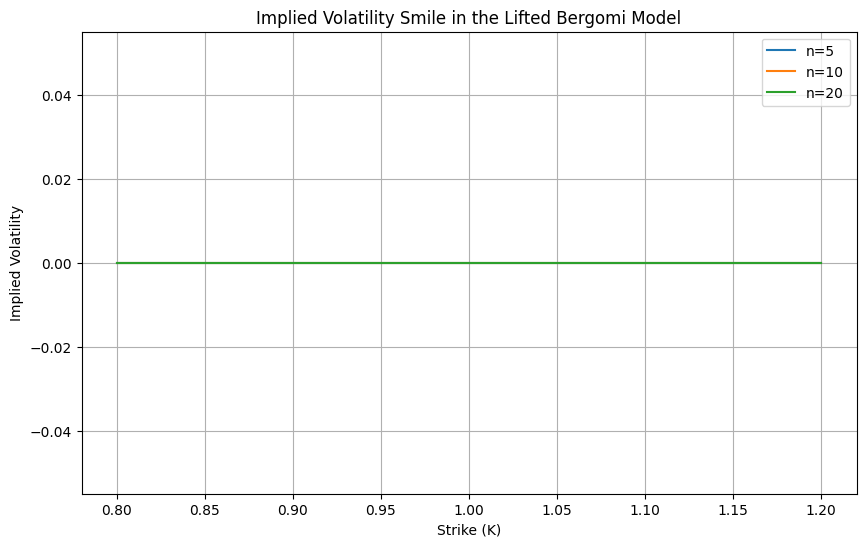

In [ ]:
# Define parameters
H = 0.1
eta = 1.9
rho = -0.9
S0 = 1
xi0 = 0.02
T = 1  # Maturity
n_values = [5, 10, 20]  # Different values of n
rn_values = [1 + 10 * n**(-0.9) for n in n_values]  # Kernel approximation
alpha = 0.6
numSim=1000

# Define the range of strikes
strike_min = 0.8  # Minimum strike
strike_max = 1.2  # Maximum strike
num_strikes = 20  # Number of strikes
strikes = np.linspace(strike_min, strike_max, num_strikes)

# Compute implied volatilities for different n values
implied_volatilities = {}
for n, rn in zip(n_values, rn_values):
    implied_volatilities[n] = []
    for K in strikes:
        implied_volatility = Call_Price_Lifted_Bergomi(H, eta, rho, S0, xi0, T, K, n, rn, alpha, numSim)
        implied_volatilities[n].append(implied_volatility)

# Plot implied volatility smile
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(strikes, implied_volatilities[n], label=f'n={n}')
plt.title('Implied Volatility Smile in the Lifted Bergomi Model')
plt.xlabel('Strike (K)')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


## 4. Options on VIX